<a href="https://colab.research.google.com/github/ncrowder/ncrowder.github.io/blob/main/dos/Decision_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

# Week 1

## Simulate a deterministic model
(Source: https://bookdown.org/manuele_leonelli/SimBook/types-of-simulations.html)

In [ ]:
# A social media influencer decides to open a new page and her target is to reach 10k followers in 10 weeks.
# Given her past experience, she assumes that each week she will get 1.5k new followers that had never followed the page and of her current followers she believes 10% will stop following the page each week.
# However, 20% of those that left the page in the past will join again each week. Will she reach her target?

In [ ]:
# Initialize arrays (length 11, all zeros)
Ft = np.zeros(11) #Followers
Ut = np.zeros(11) #Total Unfollowers
Lt = np.zeros(11) #Weekly Unfollowers
Rt = np.zeros(11) #Weekly Returners

# Loop: R uses 1-based indexing; Python uses 0-based
for i in range(10):
    Lt[i+1] = 0.1 * Ft[i]
    Rt[i+1] = 0.2 * Ut[i]
    Ut[i+1] = Ut[i] + Lt[i+1] - Rt[i+1]
    Ft[i+1] = Ft[i] + 1500 - Lt[i+1] + Rt[i+1]

# Create DataFrame
result = pd.DataFrame({
    "Followers": Ft.round(),
    "Total Unfollowers": Ut.round(),
    "Weekly Unfollowers": Lt.round(),
    "Weekly Returns": Rt.round()
})

result

,Followers,Total Unfollowers,Weekly Unfollowers,Weekly Returns
0,0.000000,0.000000,0.000000,0.000000
1,1500.000000,0.000000,0.000000,0.000000
2,2850.000000,150.000000,150.000000,0.000000
3,4095.000000,405.000000,285.000000,30.000000
4,5266.000000,734.000000,410.000000,81.000000
5,6387.000000,1113.000000,527.000000,147.000000
6,7471.000000,1529.000000,639.000000,223.000000
7,8529.000000,1971.000000,747.000000,306.000000
8,9571.000000,2429.000000,853.000000,394.000000
9,10599.000000,2901.000000,957.000000,486.000000


## Model (and plot) the pmf and cdf of a discrete random variable

In [ ]:
# Discrete values and probabilities
x = np.array([1, 2, 4, 7, 10])
p = np.array([0.10, 0.20, 0.30, 0.25, 0.15])

# CDF = cumulative sum of probabilities
cdf = np.cumsum(p)

# Combine into a table
dist = pd.DataFrame({
    "x": x,
    "PMF": p,
    "CDF": cdf
})

dist

,x,PMF,CDF
0,1,0.100000,0.100000
1,2,0.200000,0.300000
2,4,0.300000,0.600000
3,7,0.250000,0.850000
4,10,0.150000,1.000000


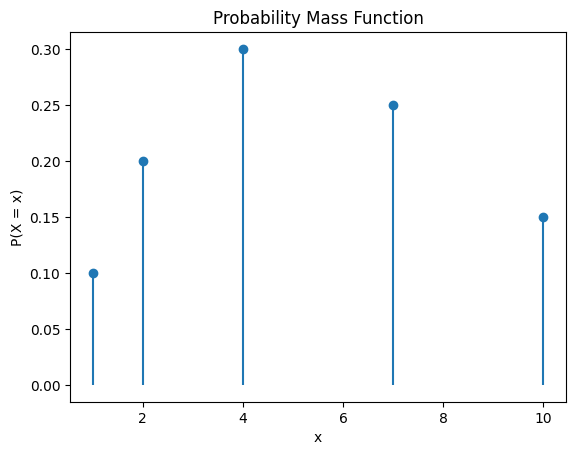

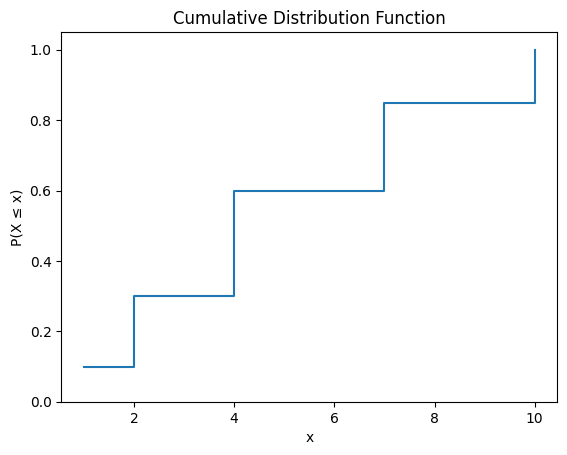

In [ ]:
# PMF
plt.stem(x, p, basefmt=" ")
plt.xlabel("x")
plt.ylabel("P(X = x)")
plt.title("Probability Mass Function")
plt.show()
# CDF
plt.step(x, cdf, where="post")
plt.xlabel("x")
plt.ylabel("P(X ≤ x)")
plt.title("Cumulative Distribution Function")
plt.ylim(0, 1.05)
plt.show()

In [ ]:
dist

,x,PMF,CDF
0,1,0.100000,0.100000
1,2,0.200000,0.300000
2,4,0.300000,0.600000
3,7,0.250000,0.850000
4,10,0.150000,1.000000


## Calculate summary measures for a discrete random variable

In [ ]:
# mean
mean = (dist.x * dist.PMF).sum()
float(mean)

4.95

In [ ]:
# median
median = dist[dist.CDF >= .5]['x'].iloc[0]
median

np.int64(4)

In [ ]:
# mode
mode = dist.loc[dist.PMF.idxmax(),"x"]
mode

np.int64(4)

In [ ]:
variance = ( (dist.x-mean)**2 * (dist.PMF) ).sum()
variance

np.float64(8.4475)

In [ ]:
sd = np.sqrt(variance)
sd

np.float64(2.906458325866724)

## Binomial distribution

In [ ]:
from scipy.stats import binom
n = 10 #number of steps
x = 5 #number of right steps
p = .8 #probability of a right step
binom.pmf(x,n,p)

np.float64(0.026424115199999956)

In [ ]:
x = range(n + 1)

df = pd.DataFrame({
    "x": x,
    "P(X = x)": binom.pmf(x, n, p),
    "P(X ≤ x)": binom.cdf(x, n, p)
})

df

,x,P(X = x),P(X ≤ x)
0,0,0.000000,0.000000
1,1,0.000004,0.000004
2,2,0.000074,0.000078
3,3,0.000786,0.000864
4,4,0.005505,0.006369
5,5,0.026424,0.032793
6,6,0.088080,0.120874
7,7,0.201327,0.322200
8,8,0.301990,0.624190
9,9,0.268435,0.892626


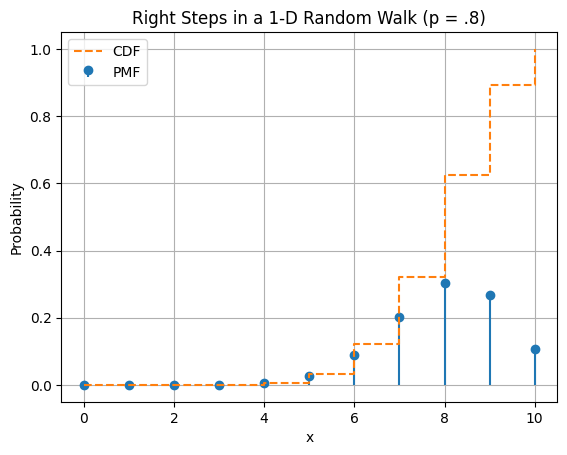

In [ ]:
# PMF as stem plot
plt.stem(
    df["x"],
    df["P(X = x)"],
    basefmt=" ",
    label="PMF"
)

# CDF as step function
plt.step(
    df["x"],
    df["P(X ≤ x)"],
    where="post",
    linestyle="--",
    label="CDF"
)

plt.xlabel("x")
plt.ylabel("Probability")
plt.title("Right Steps in a 1-D Random Walk (p = .8)")
plt.legend()
plt.grid(True)

plt.show()

## Poisson Example

In [ ]:
from scipy.stats import poisson

In [ ]:
poisson.pmf(3,2) #exactly 3

np.float64(0.18044704431548356)

In [ ]:
poisson.cdf(1,2) #<=1

np.float64(0.40600584970983794)

In [ ]:
poisson.sf(3,2) #>3

np.float64(0.14287653950145296)

In [ ]:
1 - poisson.cdf(3,2)

np.float64(0.14287653950145296)

In [ ]:
pmf = np.zeros(11)
cdf = np.zeros(11)
for k in np.arange(11):
  pmf[k] = poisson.pmf(k,2)
  cdf[k] = poisson.cdf(k,2)
df = pd.DataFrame({'k':np.arange(11),'pmf':pmf,'cdf':cdf})
df

,k,pmf,cdf
0,0,0.135335,0.135335
1,1,0.270671,0.406006
2,2,0.270671,0.676676
3,3,0.180447,0.857123
4,4,0.090224,0.947347
5,5,0.036089,0.983436
6,6,0.012030,0.995466
7,7,0.003437,0.998903
8,8,0.000859,0.999763
9,9,0.000191,0.999954


In [ ]:
mean = (df.k * df.pmf).sum()
mean

np.float64(1.9999070038499653)

## Poisson with differing lambda values

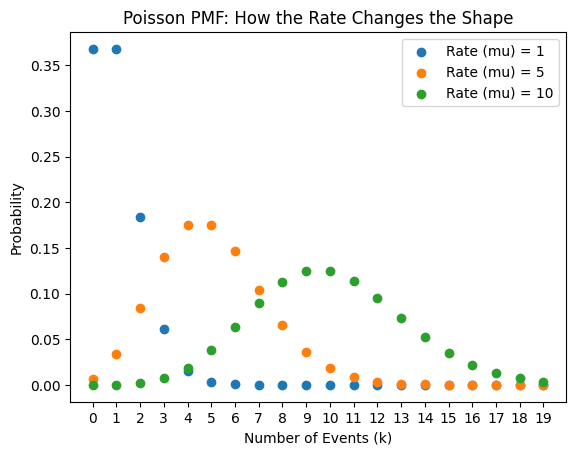

In [ ]:
# 1. Define the rates (mu) - This goes into Slot 2
rates = [1, 5, 10]

# 2. Define the range of 'k' (the count of events)
k = np.arange(0, 20)

# 3. Plotting
for mu in rates:
    # poisson.pmf(k, mu) -> Slot 1 is k, Slot 2 is mu
    pmf_values = poisson.pmf(k, mu)
    plt.scatter(k, pmf_values, label=f'Rate (mu) = {mu}', marker='o')

plt.title('Poisson PMF: How the Rate Changes the Shape')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.xticks(k)
plt.legend();

## Exponential Example

In [ ]:
#The time between server crashes on average is 4 months.  Aging does not affect the chance of a server crash.

In [ ]:
from scipy.stats import expon

In [ ]:
expon.cdf(3, loc = 0, scale = 4) #probability the server crashes before 3 months?

np.float64(0.5276334472589853)

In [ ]:
# A server is brand new and has a high-quality warranty period.
#It is physically impossible for it to crash in the first 2 months. After those 2 months, it crashes on average every 4 months.

In [ ]:
expon.cdf(3, loc = 2, scale = 4) #probability the server crashes before 3 months?  (only one month is an option here)

np.float64(0.22119921692859515)

## Normal distribution example

In [ ]:
from scipy.stats import norm

In [ ]:
norm.cdf(2000,2500,300) #chance of failure under 2000 days

np.float64(0.0477903522728147)

In [ ]:
norm.ppf(.02,2500,300) #gauranteeing bulbs that last at least 1883 days means the company only needs to replace 2% of them

np.float64(1883.875326810453)

In [ ]:
norm.cdf(1883.875,2500,300)

np.float64(0.019999947254882584)

In [ ]:
norm.sf(3200,2500,300) #only about 1% of bulbs will last longer than 3200 days

np.float64(0.009815328628645334)